In [1]:
import numpy as np
import cv2

import PIL.Image as Image
import os

import matplotlib.pylab as plt

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
IMAGE_SHAPE = (224, 224)

classifier = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4", input_shape=IMAGE_SHAPE+(3,))
])

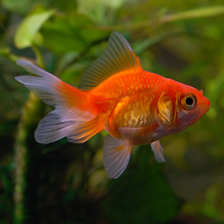

In [3]:
goldfish = Image.open('goldfish.jpg').resize(IMAGE_SHAPE)
goldfish

In [4]:
goldfish = np.array(goldfish)/255.0
goldfish.shape

(224, 224, 3)

In [5]:
goldfish

array([[[0.28235294, 0.33333333, 0.07058824],
        [0.31372549, 0.37254902, 0.09019608],
        [0.34901961, 0.41960784, 0.11764706],
        ...,
        [0.32941176, 0.39215686, 0.00392157],
        [0.32156863, 0.38431373, 0.00392157],
        [0.30980392, 0.36862745, 0.        ]],

       [[0.28627451, 0.33333333, 0.08235294],
        [0.3254902 , 0.38039216, 0.10980392],
        [0.35294118, 0.42352941, 0.12941176],
        ...,
        [0.32156863, 0.38039216, 0.00392157],
        [0.31372549, 0.37254902, 0.00392157],
        [0.30196078, 0.36078431, 0.        ]],

       [[0.28627451, 0.33333333, 0.08627451],
        [0.31372549, 0.36862745, 0.10196078],
        [0.34509804, 0.41568627, 0.12941176],
        ...,
        [0.31764706, 0.37647059, 0.00392157],
        [0.30980392, 0.36862745, 0.00784314],
        [0.29803922, 0.35686275, 0.00392157]],

       ...,

       [[0.05490196, 0.10980392, 0.01568627],
        [0.05098039, 0.11372549, 0.01960784],
        [0.05098039, 0

In [6]:
goldfish[np.newaxis, ...]

array([[[[0.28235294, 0.33333333, 0.07058824],
         [0.31372549, 0.37254902, 0.09019608],
         [0.34901961, 0.41960784, 0.11764706],
         ...,
         [0.32941176, 0.39215686, 0.00392157],
         [0.32156863, 0.38431373, 0.00392157],
         [0.30980392, 0.36862745, 0.        ]],

        [[0.28627451, 0.33333333, 0.08235294],
         [0.3254902 , 0.38039216, 0.10980392],
         [0.35294118, 0.42352941, 0.12941176],
         ...,
         [0.32156863, 0.38039216, 0.00392157],
         [0.31372549, 0.37254902, 0.00392157],
         [0.30196078, 0.36078431, 0.        ]],

        [[0.28627451, 0.33333333, 0.08627451],
         [0.31372549, 0.36862745, 0.10196078],
         [0.34509804, 0.41568627, 0.12941176],
         ...,
         [0.31764706, 0.37647059, 0.00392157],
         [0.30980392, 0.36862745, 0.00784314],
         [0.29803922, 0.35686275, 0.00392157]],

        ...,

        [[0.05490196, 0.10980392, 0.01568627],
         [0.05098039, 0.11372549, 0.01960784]

In [7]:
goldfish.shape

(224, 224, 3)

In [8]:
result = classifier.predict(goldfish[np.newaxis, ...])
result.shape

(1, 1001)

In [9]:
result

array([[ 0.2210783 ,  2.0497668 ,  9.622809  , ..., -1.4619296 ,
        -0.2823091 , -0.25916258]], dtype=float32)

In [10]:
predicted_label_index = np.argmax(result)

In [11]:
predicted_label_index

2

In [12]:
image_label = []
with open('ImageNetLabels.txt', 'r') as f:
    image_label = f.read().splitlines()
image_label[:5]

['background', 'tench', 'goldfish', 'great white shark', 'tiger shark']

In [13]:
image_label[predicted_label_index]

'goldfish'

## Flower Dataset

In [14]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)
# cache_dir indicates where to download data. I specified . which means current directory
# untar true will unzip it

In [15]:
data_dir

'.\\datasets\\flower_photos'

In [16]:
#converting to path to use lists
import pathlib
data_dir = pathlib.Path(data_dir)

In [17]:
data_dir

WindowsPath('datasets/flower_photos')

In [18]:
list(data_dir.glob('*/*.jpg'))[:5]

[WindowsPath('datasets/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172636503_21bededa75_n.jpg')]

In [19]:
image_count = len(list(data_dir.glob('*/*.jpg')))
image_count

3670

In [20]:
roses = list(data_dir.glob('roses/*'))[:5]
roses

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

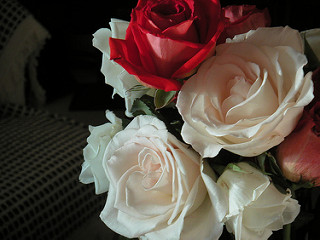

In [21]:
import PIL
PIL.Image.open(str(roses[1]))


In [22]:
tulips = list(data_dir.glob('tulips/*'))[:5]
tulips

[WindowsPath('datasets/flower_photos/tulips/100930342_92e8746431_n.jpg'),
 WindowsPath('datasets/flower_photos/tulips/10094729603_eeca3f2cb6.jpg'),
 WindowsPath('datasets/flower_photos/tulips/10094731133_94a942463c.jpg'),
 WindowsPath('datasets/flower_photos/tulips/10128546863_8de70c610d.jpg'),
 WindowsPath('datasets/flower_photos/tulips/10163955604_ae0b830975_n.jpg')]

In [23]:
cv2.imread(str(tulips[0]))

array([[[ 15,  46,  19],
        [ 16,  47,  16],
        [ 16,  47,  14],
        ...,
        [ 70,  74, 103],
        [ 70,  74, 102],
        [ 70,  75, 100]],

       [[ 17,  48,  19],
        [ 19,  50,  17],
        [ 19,  51,  16],
        ...,
        [ 69,  73, 101],
        [ 69,  73, 101],
        [ 69,  74,  99]],

       [[ 21,  52,  21],
        [ 21,  54,  19],
        [ 22,  55,  18],
        ...,
        [ 70,  74, 102],
        [ 70,  74, 102],
        [ 70,  75, 100]],

       ...,

       [[ 70,  93,  78],
        [ 70,  93,  78],
        [ 68,  91,  76],
        ...,
        [ 72, 105,  71],
        [ 74, 105,  72],
        [ 75, 106,  73]],

       [[ 70,  92,  80],
        [ 69,  91,  79],
        [ 66,  89,  75],
        ...,
        [ 75, 106,  73],
        [ 75, 106,  73],
        [ 77, 108,  75]],

       [[ 66,  93,  83],
        [ 67,  93,  77],
        [ 66,  88,  69],
        ...,
        [ 75, 107,  76],
        [ 75, 107,  76],
        [ 75, 107,  76]]

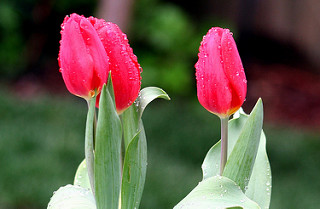

In [24]:
PIL.Image.open(str(tulips[0]))

In [25]:
## Making a dictionary for convinence

In [26]:
flower_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflower': list(data_dir.glob('sunflower/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [27]:
flower_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflower': 3,
    'tulips': 4,
}

In [28]:
flower_images_dict['roses'][:5]

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

In [29]:
img = cv2.imread(str(flower_images_dict['roses'][0]))
img

array([[[ 0, 15,  6],
        [ 0, 15,  6],
        [ 0, 17,  8],
        ...,
        [24, 51, 31],
        [25, 52, 32],
        [26, 53, 33]],

       [[ 7, 22, 14],
        [ 7, 22, 14],
        [ 6, 21, 13],
        ...,
        [20, 46, 30],
        [23, 49, 33],
        [25, 51, 35]],

       [[12, 23, 15],
        [12, 23, 15],
        [11, 22, 14],
        ...,
        [20, 42, 30],
        [23, 45, 33],
        [26, 48, 36]],

       ...,

       [[19, 30, 27],
        [14, 24, 18],
        [12, 20, 13],
        ...,
        [ 4, 13,  3],
        [ 0,  8,  1],
        [ 0,  5,  0]],

       [[19, 30, 28],
        [18, 27, 24],
        [15, 23, 16],
        ...,
        [ 3, 12,  2],
        [ 1,  9,  2],
        [ 0,  7,  2]],

       [[ 9, 19, 19],
        [17, 25, 24],
        [22, 29, 24],
        ...,
        [ 1, 12,  2],
        [ 2, 10,  3],
        [ 3, 11,  4]]], dtype=uint8)

In [30]:
img.shape

(240, 179, 3)

In [31]:
cv2.resize(img, (224, 224)).shape

(224, 224, 3)

In [32]:
X = []
Y = []
for flower_name, images in flower_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_image = cv2.resize(img, (224, 224))
        X.append(resized_image)
        Y.append(flower_labels_dict[flower_name])

In [33]:
X = np.array(X)
Y = np.array(Y)

## Train Test Split

In [34]:
import sklearn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y , random_state=0)

In [35]:
X_train_scaled = X_train/255.0
X_test_scaled = X_test/255.0

In [36]:
X[0].shape

(224, 224, 3)

In [37]:
IMAGE_SHAPE+(3, )

(224, 224, 3)

In [38]:
x0_resized = cv2.resize(X[0], IMAGE_SHAPE)
x1_resized = cv2.resize(X[1], IMAGE_SHAPE)
x2_resized = cv2.resize(X[2], IMAGE_SHAPE)

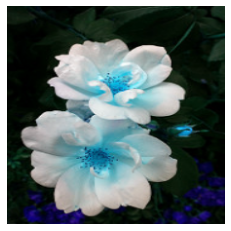

In [39]:
plt.axis('off')
plt.imshow(x0_resized)

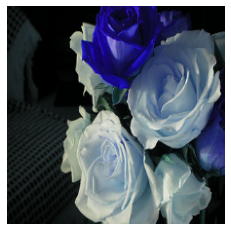

In [40]:
plt.axis('off')
plt.imshow(x1_resized)

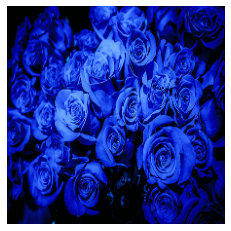

In [41]:
plt.axis('off')
plt.imshow(x2_resized)

In [42]:
predicted = classifier.predict(np.array([x0_resized, x1_resized, x2_resized]))
predicted = np.argmax(predicted, axis=1)
predicted

array([795, 880, 795], dtype=int64)

In [43]:
image_label[795]

'shower curtain'

In [44]:
image_label[800]

'sliding door'

## retraining model using pretraineed mpdel

In [45]:
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model, input_shape=(224, 224, 3), trainable=False)

In [46]:
num_of_flowers = 5
model = tf.keras.Sequential([
    pretrained_model_without_top_layer,
    keras.layers.Dense(num_of_flowers)
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_1 (KerasLayer)   (None, 1280)              2257984   
_________________________________________________________________
dense (Dense)                (None, 5)                 6405      
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________


In [47]:
model.compile(optimizer='adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [48]:
model.fit(X_train_scaled, y_train, epochs=5)

Epoch 1/5
70/70 [==============================] - 52s 604ms/step - loss: 0.6673 - accuracy: 0.7388
Epoch 2/5
70/70 [==============================] - 41s 591ms/step - loss: 0.3259 - accuracy: 0.8851
Epoch 3/5
70/70 [==============================] - 43s 619ms/step - loss: 0.2564 - accuracy: 0.9134
Epoch 4/5
70/70 [==============================] - 44s 630ms/step - loss: 0.2182 - accuracy: 0.9282
Epoch 5/5
70/70 [==============================] - 41s 592ms/step - loss: 0.1845 - accuracy: 0.9452


In [49]:
model.evaluate(X_test_scaled, y_test)

24/24 [==============================] - 17s 592ms/step - loss: 0.3402 - accuracy: 0.8708


[0.34017735719680786, 0.8707940578460693]

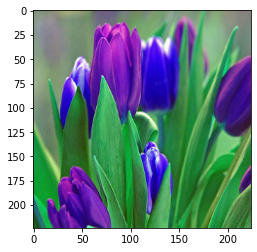

In [50]:
plt.imshow(X_test_scaled[39])

In [51]:
test_predict = model.predict(X_test_scaled[39][np.newaxis, ...])

In [52]:
predicted_index = np.argmax(test_predict)

In [53]:
predicted_labels_dict = {
    0: 'roses',
    1: 'daisy',
    2: 'dandelion',
    3: 'sunflower',
    4: 'tulips',
}

In [54]:
predicted_labels_dict[predicted_index]

'tulips'

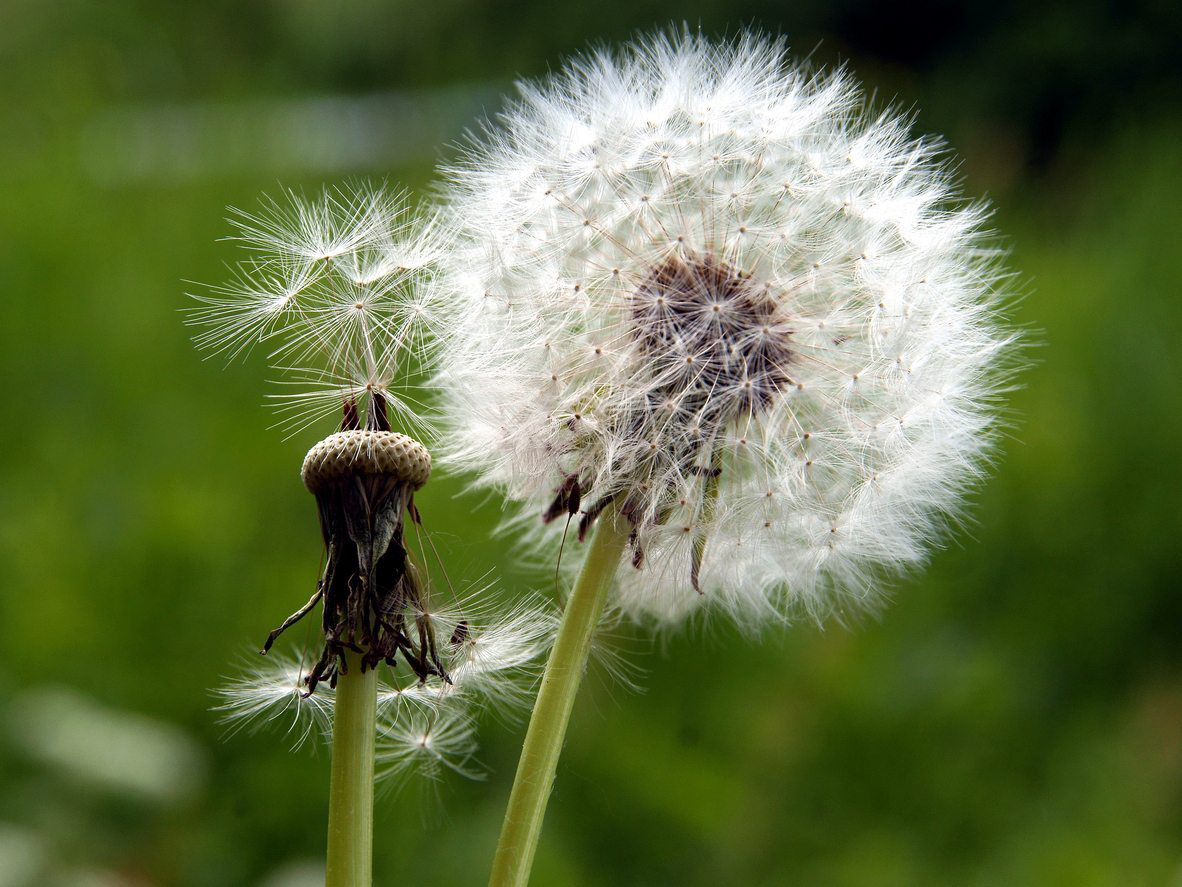

In [55]:
new_flower = Image.open('dandelion.jpg')
new_flower

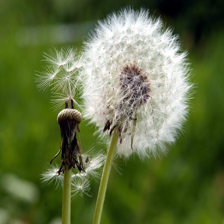

In [56]:
new_flower = new_flower.resize(IMAGE_SHAPE)
new_flower

In [57]:
new_flower = np.array(new_flower)/255.0
new_flower

array([[[0.3254902 , 0.37254902, 0.17254902],
        [0.32156863, 0.37254902, 0.16470588],
        [0.3254902 , 0.37647059, 0.16470588],
        ...,
        [0.03137255, 0.0745098 , 0.02352941],
        [0.02745098, 0.0745098 , 0.02352941],
        [0.01960784, 0.06666667, 0.02745098]],

       [[0.32156863, 0.36862745, 0.17254902],
        [0.3254902 , 0.37647059, 0.16862745],
        [0.32156863, 0.37254902, 0.16078431],
        ...,
        [0.02745098, 0.07058824, 0.01960784],
        [0.02352941, 0.07058824, 0.02352941],
        [0.01960784, 0.06666667, 0.02745098]],

       [[0.3254902 , 0.37254902, 0.17254902],
        [0.32156863, 0.37254902, 0.16470588],
        [0.31764706, 0.36862745, 0.15686275],
        ...,
        [0.02352941, 0.06666667, 0.01568627],
        [0.02352941, 0.07058824, 0.02352941],
        [0.01960784, 0.06666667, 0.02745098]],

       ...,

       [[0.5254902 , 0.57254902, 0.43137255],
        [0.50588235, 0.55294118, 0.41176471],
        [0.47843137, 0

In [58]:
new_predition = model.predict(new_flower[np.newaxis, ...])
new_predition

array([[-3.0290315, -1.2896689,  7.7212696, -9.379931 , -4.167275 ]],
      dtype=float32)

In [59]:
new_predicted_index = np.argmax(new_predition)

In [60]:
predicted_labels_dict[new_predicted_index]

'dandelion'